In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

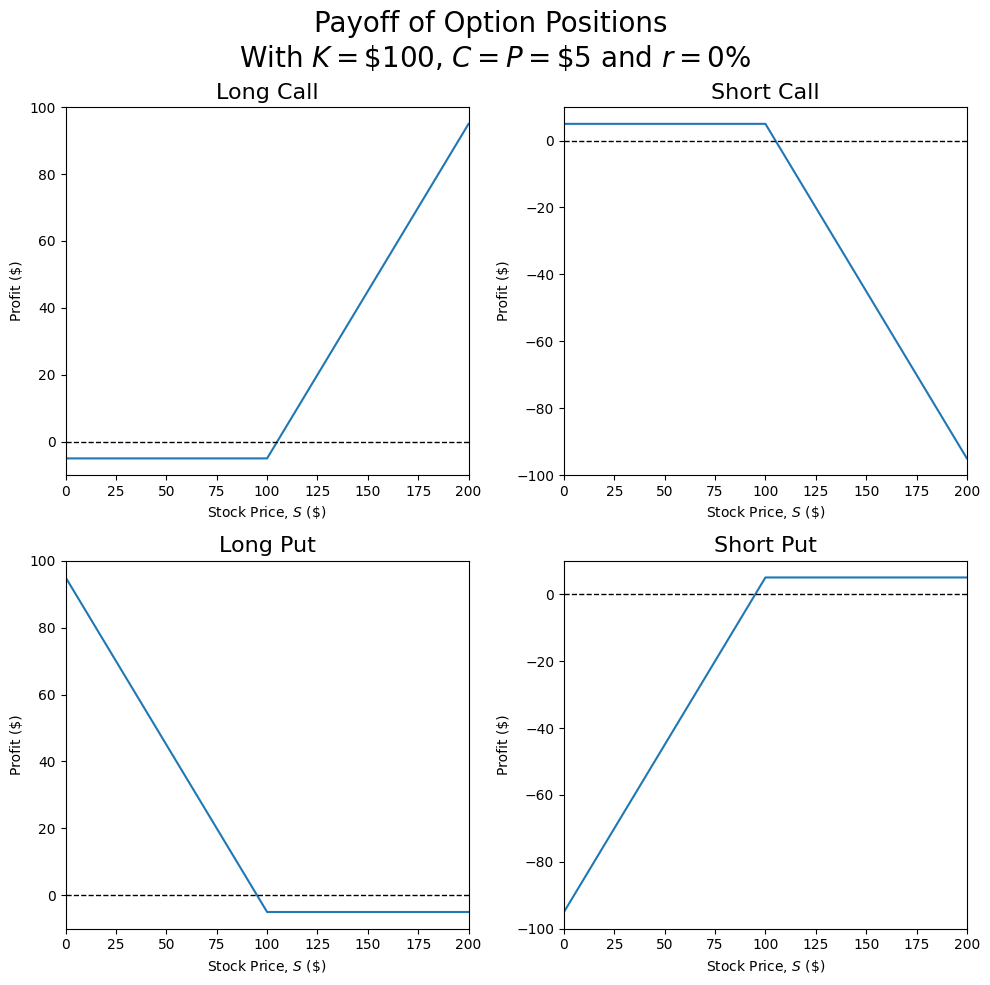

In [2]:
prices = np.arange(0, 201, 1)
k = 100
premium = 5

long_call = []
short_call = []
long_put = []
short_put = []

for price in prices:
    long_call.append(max(price - k, 0) - premium)
    short_call.append(-max(price - k, 0) + premium)
    long_put.append(max(k - price, 0) - premium)
    short_put.append(-max(k - price, 0) + premium)
    
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, data in enumerate([long_call, short_call, long_put, short_put]):
    ax[i // 2, i % 2].plot(prices, data)
    ax[i // 2, i % 2].axhline(0, color='black', lw=1, linestyle='--')
    ax[i // 2, i % 2].set_xlim(0, 200)
    ax[i // 2, i % 2].set_title(['Long Call', 'Short Call', 'Long Put', 'Short Put'][i], fontsize=16)
    ax[i // 2, i % 2].set_xlabel(rf'Stock Price, $S$ (\$)')
    ax[i // 2, i % 2].set_ylabel('Profit ($)')
    
fig.suptitle(
    (
        'Payoff of Option Positions \n'
        rf'With $K=\$100$, $C=P=\$5$ and $r=0\%$'
    ),
    fontsize=20
)
fig.tight_layout()

Text(0.5, 1.0, 'Short Put')

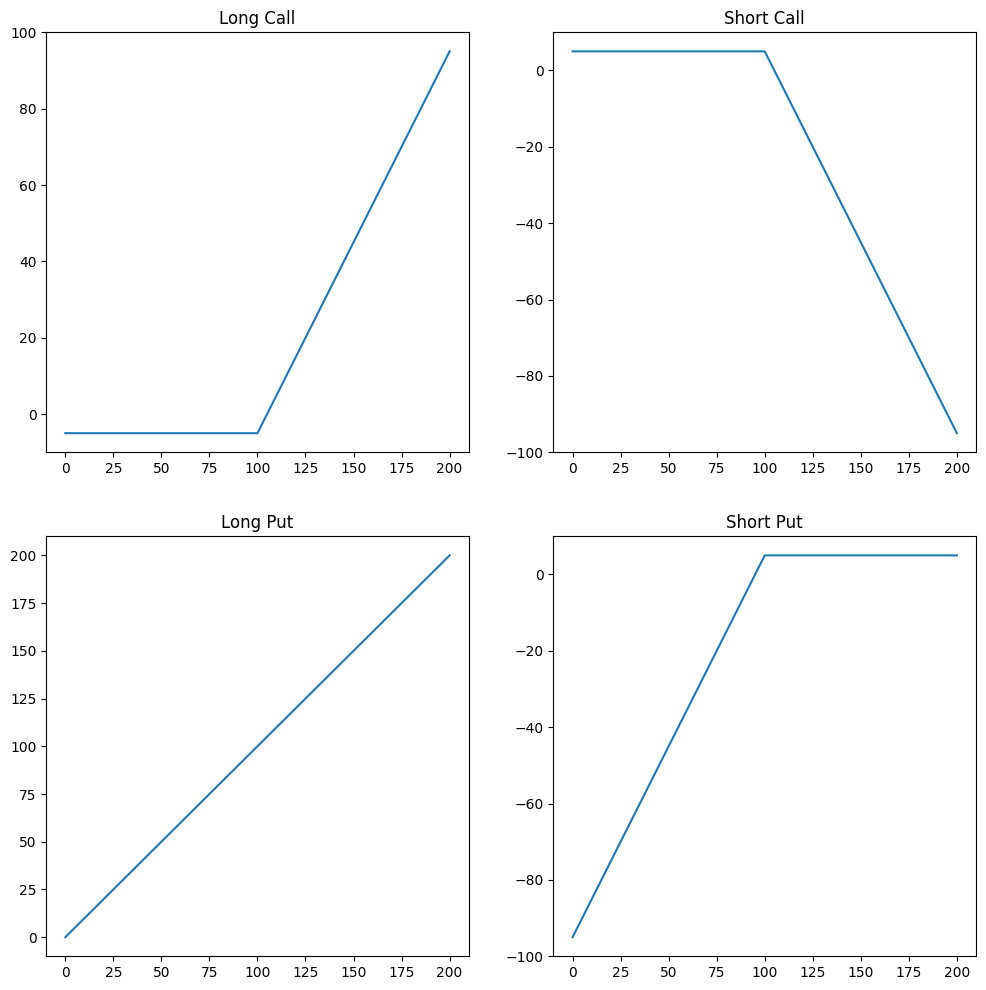

In [3]:
    
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].plot(prices, long_call)
ax[0, 0].set_title('Long Call')

ax[0, 1].plot(prices, short_call)
ax[0, 1].set_title('Short Call')

ax[1, 0].plot(prices, )
ax[1, 0].set_title('Long Put')

ax[1, 1].plot(prices, short_put)
ax[1, 1].set_title('Short Put')

In [4]:
def get_options(ticker: str) -> pd.DataFrame:
    stock = yf.Ticker(ticker)
    expire_dates = stock.options
    
    options = pd.DataFrame()

    for date in expire_dates:
        data = stock.option_chain(date)
        df = pd.concat([data.calls, data.puts], axis=0)
        df['expirationDate'] = date
        options = pd.concat([options, df], axis=0)
        
    return options.drop(columns=['currency', 'impliedVolatility'])

In [5]:
ticker = 'SPY'

options = get_options(ticker)

In [6]:
options.head(10)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,inTheMoney,contractSize,expirationDate
0,SPY240725C00450000,2024-07-25 17:33:23+00:00,450.0,94.43,88.05,89.27,-0.250000,-0.264047,22.0,13.0,True,REGULAR,2024-07-25
1,SPY240725C00465000,2024-07-25 18:09:08+00:00,465.0,78.56,73.05,74.27,-9.120003,-10.401463,1.0,1.0,True,REGULAR,2024-07-25
2,SPY240725C00470000,2024-07-18 18:34:08+00:00,470.0,83.29,68.05,69.27,0.000000,0.000000,NaN,20.0,True,REGULAR,2024-07-25
3,SPY240725C00475000,2024-07-25 17:05:37+00:00,475.0,71.84,63.04,64.27,2.739998,3.965265,3.0,4.0,True,REGULAR,2024-07-25
4,SPY240725C00480000,2024-07-12 14:07:28+00:00,480.0,80.01,58.04,59.27,0.000000,0.000000,NaN,1.0,True,REGULAR,2024-07-25
5,SPY240725C00481000,2024-07-24 16:40:13+00:00,481.0,63.13,57.04,58.27,0.000000,0.000000,1.0,1.0,True,REGULAR,2024-07-25
6,SPY240725C00484000,2024-07-25 18:55:51+00:00,484.0,56.76,54.04,55.27,-1.230003,-2.121061,175.0,175.0,True,REGULAR,2024-07-25
7,SPY240725C00485000,2024-07-25 18:51:03+00:00,485.0,56.36,53.05,54.26,-0.820000,-1.434067,205.0,238.0,True,REGULAR,2024-07-25
8,SPY240725C00490000,2024-07-25 15:26:20+00:00,490.0,53.19,48.05,49.27,-2.900002,-5.170265,2.0,2.0,True,REGULAR,2024-07-25
9,SPY240725C00493000,2024-07-24 19:54:02+00:00,493.0,48.17,45.05,46.26,0.000000,0.000000,1214.0,320.0,True,REGULAR,2024-07-25
